In [1]:
import math
import warnings
import numpy as np 
import pandas as pd 
import matplotlib
# import geopandas as gp
import seaborn as sns
from pylab import rcParams
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt 
from matplotlib.axis import Axis
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
pd.options.display.max_rows = None
pd.options.display.max_columns = None
%matplotlib inline


**Source of data**

https://github.com/ahurford/covid-nl

https://geohub-gnl.hub.arcgis.com/datasets/GNL::prov-covid-daily-stats-v2-public-view/about

https://health-infobase.canada.ca/covid-19/epidemiological-summary-covid-19-cases.html?stat=num&measure=tests&map=pt#a2

https://github.com/ahurford/covid-nl/blob/main/Test_NL(twosources).csv



In [2]:
prov_covid_daily_stats = pd.read_csv('Prov_Covid_Daily_Stats_v2_Public_View.csv')
test_nl = pd.read_csv('Test_NL_twosources.csv')
coviddata = pd.read_csv('covid19-download.csv')
nl_update = pd.read_csv('NLupdate.csv')
# nl_shapefile = pd.read_csv('Prov_Covid_Daily_Stats_v2_Public_View.shp')

In [3]:
# convert datetime to its correct format and merge
test_nl['date'] = pd.to_datetime(test_nl['date'])
nl_update['date'] = pd.to_datetime(nl_update['date'])
# merge data
nl_test_merge = nl_update.merge(test_nl, left_on='date', right_on='date')  
nl_test_merge

,date,EH,CH,WH,LG,private,total,days.since,cum.hospital,cum.mort,total.test,numtest
0,2021-12-15,3,1,9,0,0,13,2,0,0,354535.0,409138.0
1,2021-12-17,11,4,31,0,0,46,2,0,0,357188.0,410694.0
2,2021-12-18,5,16,2,0,0,23,1,0,0,NaN,411976.0
3,2021-12-19,13,16,8,1,0,38,1,0,0,361177.0,411976.0
4,2021-12-20,4,10,13,0,0,27,1,0,0,362655.0,411976.0
5,2021-12-21,9,10,8,0,0,27,1,0,0,365434.0,417198.0
6,2021-12-22,37,10,12,1,0,60,1,0,0,368892.0,419273.0
7,2021-12-23,73,19,7,1,0,100,1,0,0,372311.0,421734.0
8,2021-12-24,47,8,26,4,0,85,1,0,0,376214.0,424645.0
9,2021-12-27,262,29,62,4,0,357,3,0,0,NaN,434130.0


In [4]:
# remove whitespaces in column names
nl_test_merge.columns = nl_test_merge.columns.str.strip()
# replace dot in column names with underscore
nl_test_merge.columns = [col.replace('.','_') for col in list(nl_test_merge.columns)]
nl_test_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          21 non-null     datetime64[ns]
 1   EH            21 non-null     int64         
 2   CH            21 non-null     int64         
 3   WH            21 non-null     int64         
 4   LG            21 non-null     int64         
 5   private       21 non-null     int64         
 6   total         21 non-null     int64         
 7   days_since    21 non-null     int64         
 8   cum_hospital  21 non-null     int64         
 9   cum_mort      21 non-null     int64         
 10  total_test    15 non-null     float64       
 11  numtest       20 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 2.1 KB


**How quickly is NL testing for potential infections?**

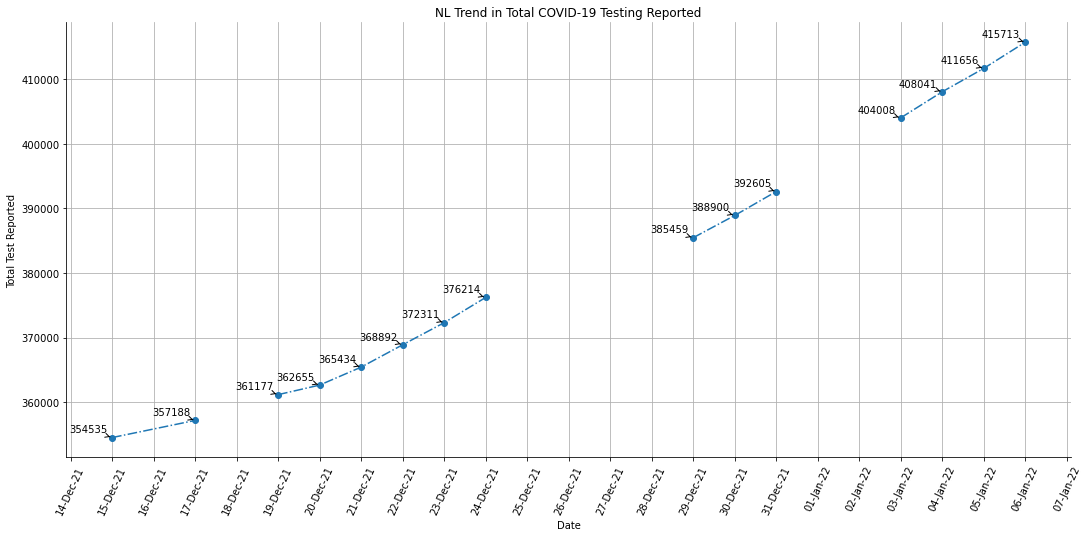

In [5]:
fig, ax = plt.subplots(figsize=(18, 8))
cov_date = pd.Series(nl_test_merge['total_test'].values, index = nl_test_merge['date'])
for index, row in nl_test_merge.iterrows():
    if (not pd.isna(row['total_test'])):
        plt.annotate('{:d}'.format(int(row['total_test'])), xy=(row['date'], row['total_test']),
                     xytext=(-5, 5), ha='right', textcoords='offset points', arrowprops=dict(arrowstyle='->', shrinkA=1))
plt.plot(cov_date, '-.',marker = 'o');
ax.set(title="NL Trend in Total COVID-19 Testing Reported",xlabel='Date', ylabel='Total Test Reported')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%d-%b-%y"))
ax.tick_params(axis="x", labelrotation= 65)
# ax.set_xlim([datetime(2021, 12, 15),datetime(2022, 1, 7)])
plt.grid()
sns.despine()
plt.show()

**Reported cases by NL Regional Health Authority**

In [6]:
#  set date as index
nl_test_merge.set_index('date', drop=True, inplace=True)

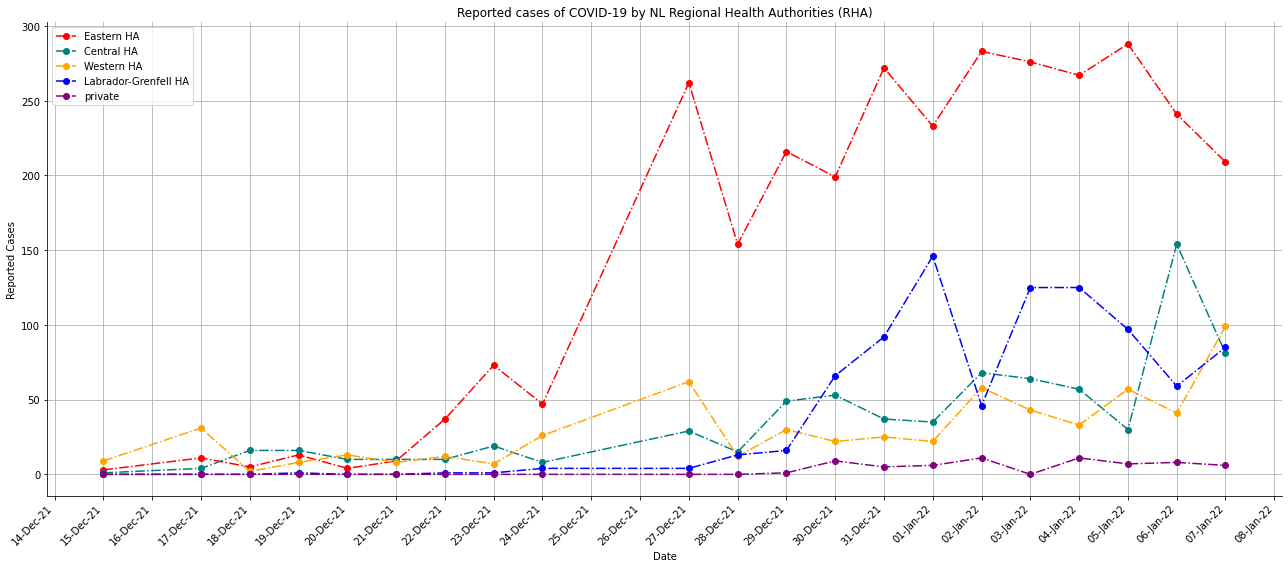

In [7]:
def plot_rha(df):
    # sns.set_palette(sns.hls_palette(10, l=.45, s=.8))
    fig, ax = plt.subplots(figsize=(18, 8))
    health_authority = {'EH':'Eastern HA','CH':'Central HA','WH':'Western HA','LG':'Labrador-Grenfell HA','private':'private'}
    counter = 0
    for rha, labe in zip(health_authority.keys(),health_authority.values()):
        df_rha = df[rha]
        label = labe
        if rha == 'EH':
            color = 'r'
        elif rha == 'CH':
            color = 'teal'
        elif rha == 'WH':
            color = 'orange'
        elif rha == 'private':
            color = 'purple'
        else:
            color = 'b'
        df_rha.plot(label = label, ls = '-.', marker = 'o', color = color)
        counter += 1
    ax.set(title="Reported cases of COVID-19 by NL Regional Health Authorities (RHA)", xlabel='Date', ylabel='Reported Cases')
    sns.despine()
    ax.xaxis.set_major_locator(mdates.DayLocator())
    #defines the label format
    ax.xaxis.set_major_formatter(DateFormatter("%d-%b-%y"))
    ax.tick_params(axis="x", labelrotation= 45)
    # ax.set_xlim([datetime(2021, 12, 15),datetime(2022, 1, 7)])
    plt.legend(loc = 'upper left')
    plt.tight_layout()
    plt.grid()
    plt.show()
# draw plot
plot_rha(nl_test_merge)

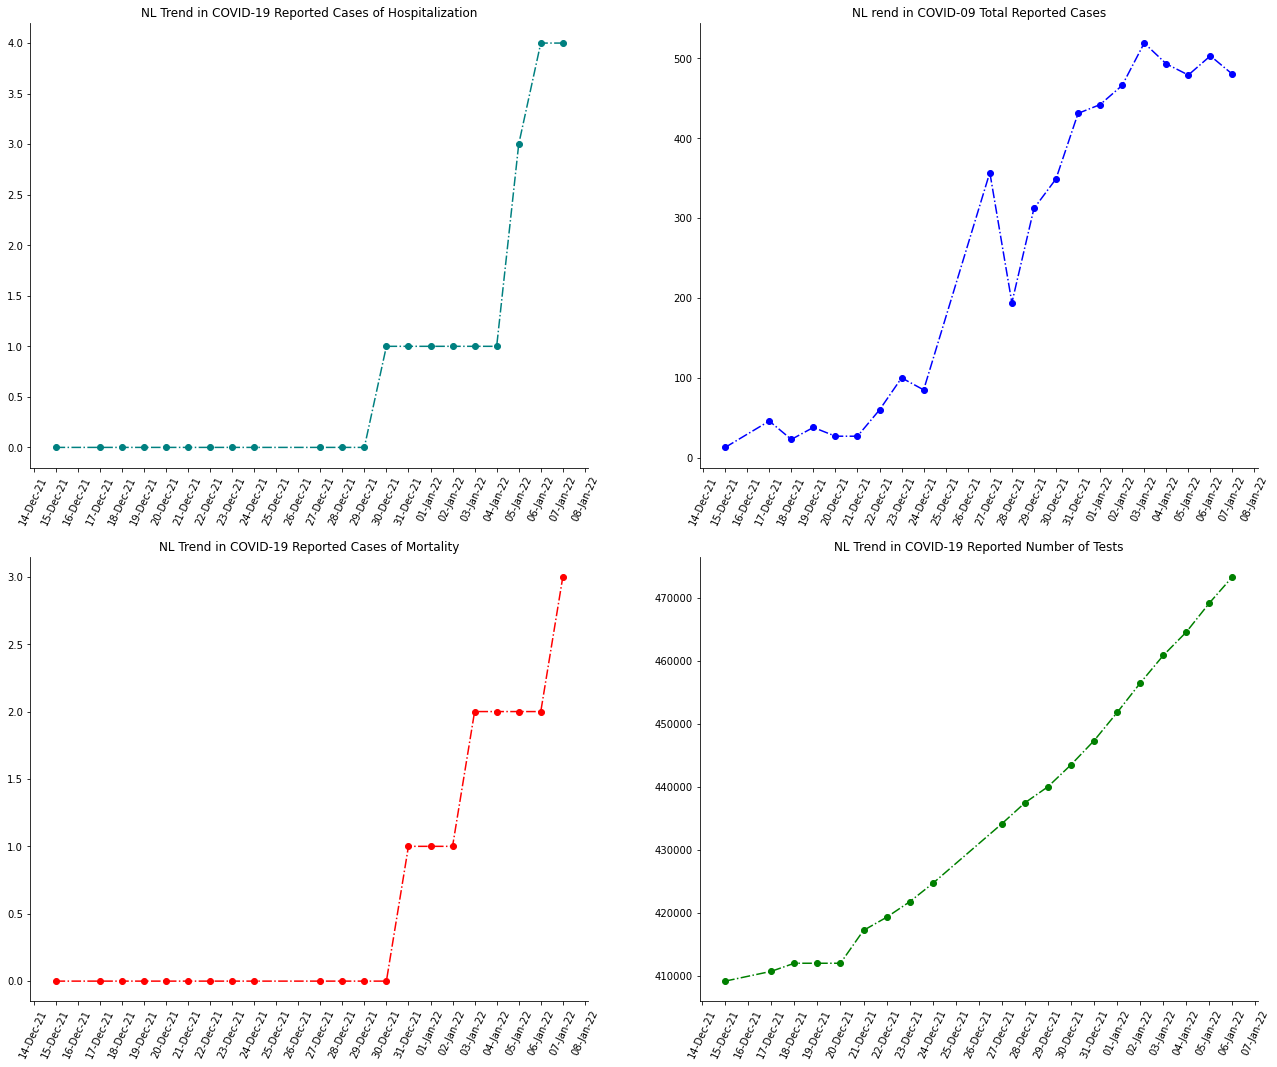

In [8]:
fig, ax = plt.subplots(2,2,figsize=(22, 18))

ax[0,0].plot(nl_test_merge.index,nl_test_merge['cum_hospital'],ls = '-.', marker = 'o', color = 'teal') 
ax[0,0].set(title="NL Trend in COVID-19 Reported Cases of Hospitalization")
ax[0,0].xaxis.set_major_locator(mdates.DayLocator())
ax[0,0].xaxis.set_major_formatter(DateFormatter("%d-%b-%y"))
ax[0,0].tick_params(axis="x", labelrotation= 65)
# ax[0,0].set_xlim([datetime(2021, 12, 15),datetime(2022, 1, 7)])

ax[1,0].plot(nl_test_merge.index,nl_test_merge['cum_mort'],ls = '-.', marker = 'o', color = 'r') 
ax[1,0].set(title="NL Trend in COVID-19 Reported Cases of Mortality")
ax[1,0].xaxis.set_major_locator(mdates.DayLocator())
ax[1,0].xaxis.set_major_formatter(DateFormatter("%d-%b-%y"))
ax[1,0].tick_params(axis="x", labelrotation= 65)
# ax[1,0].set_xlim([datetime(2021, 12, 15),datetime(2022, 1, 7)])

ax[0,1].plot(nl_test_merge.index,nl_test_merge['total'],ls = '-.', marker = 'o', color = 'b') 
ax[0,1].set(title="NL rend in COVID-09 Total Reported Cases")
ax[0,1].xaxis.set_major_locator(mdates.DayLocator())
ax[0,1].xaxis.set_major_formatter(DateFormatter("%d-%b-%y"))
ax[0,1].tick_params(axis="x", labelrotation= 65)

# ax[0,1].set_xlim([datetime(2021, 12, 15),datetime(2022, 1, 7)])

ax[1,1].plot(nl_test_merge.index,nl_test_merge['numtest'],ls = '-.', marker = 'o', color = 'g') 
ax[1,1].set(title="NL Trend in COVID-19 Reported Number of Tests")
ax[1,1].xaxis.set_major_locator(mdates.DayLocator())
ax[1,1].xaxis.set_major_formatter(DateFormatter("%d-%b-%y"))
ax[1,1].tick_params(axis="x", labelrotation= 65)
# ax[1,1].set_xlim([datetime(2021, 12, 15),datetime(2022, 1, 7)])
sns.despine()
plt.show()

In [9]:
corr_coef = nl_test_merge['cum_hospital'].corr(nl_test_merge['cum_mort'])
print(f'The correlation coefficient between hospitalization and mortality is about {round(corr_coef,3)}')

The correlation coefficient between hospitalization and mortality is about 0.87


The combined value of hosptalization and daily mortality can very reliable for estimating the current and future trends of COVID-19 progression in NL.

The visualization above clearly indicates a strong positive correlation between the cumulative cases of hospitalization and mortality as supported from below.

**Reduce data to daily counts for hospitalization, mortality and number of tests**

In [10]:
nl_test_merge['daily_hosp'] = nl_test_merge['cum_hospital'].diff() 
nl_test_merge['daily_mort'] = nl_test_merge['cum_mort'].diff() 
nl_test_merge['daily_numtest'] = nl_test_merge['numtest'].diff()#.rolling(window = 7).mean() 
# filling the NaN in daily hosp and daily mort evaluated with the help of info from 2021-12-14, unfortunately this data isn't available
# nl_test_merge.loc[0,'daily_hosp'] = 0
# nl_test_merge.loc[0,'daily_mort'] = 0
# nl_test_merge.loc[0,'daily_numtest'] = 0

**Visualizing daily counts of tests**

Dotted vertical lines indicates the gap of missing values for the number of tests taking for the Christmas break. 

It can be inferred from the average values of tests reported that the recorded value on 27th can be considered averaged value for the three (3) days i.e 25th-27th Dec. 

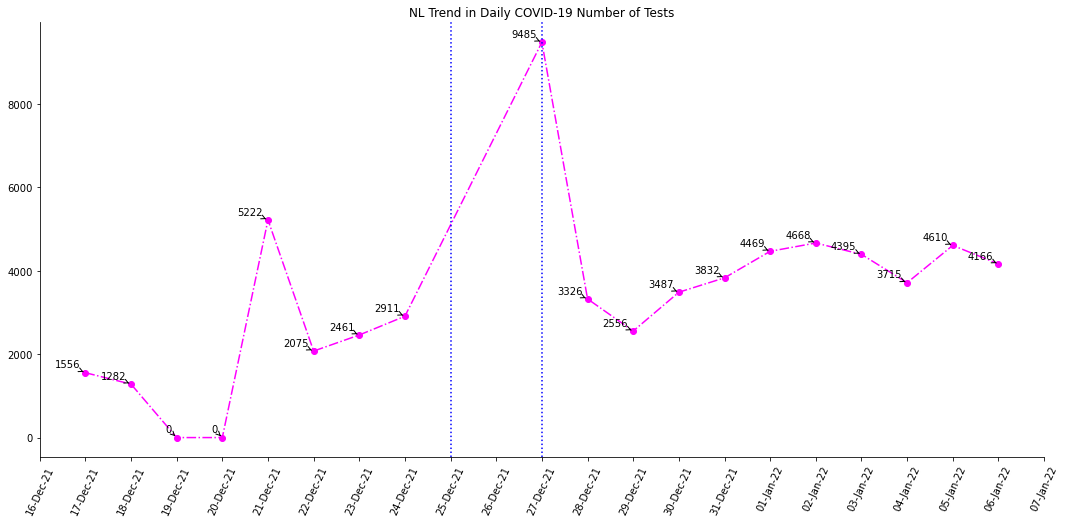

In [11]:
fig, ax = plt.subplots(figsize=(18, 8))
for index, row in nl_test_merge.iterrows():
    if (not pd.isna(row['daily_numtest'])):
        plt.annotate('{:d}'.format(int(row['daily_numtest'])), xy=(index, row['daily_numtest']),
        xytext=(-5, 5), ha='right', textcoords='offset points', arrowprops=dict(arrowstyle='->', shrinkA=1))
ax.plot(nl_test_merge.index,nl_test_merge['daily_numtest'],ls = '-.', marker = 'o', color = 'magenta') 
ax.set(title="NL Trend in Daily COVID-19 Number of Tests")
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%d-%b-%y"))
ax.tick_params(axis="x", labelrotation= 65)
# ax.set_xlim([datetime(2021, 12, 15),datetime(2022, 1, 7)])
ax.axvline(datetime(2021, 12, 25),ls= ':', c="b")
ax.axvline(datetime(2021, 12, 27),ls= ':', c="b")
sns.despine()
plt.show()

In [12]:
# Taking the moving average will smoothen the data, and further reduce the anomalies in the daily cases.
# fig, ax = plt.subplots(figsize=(10, 8))
# for index, row in nl_test_merge.iterrows():
#     if (not pd.isna(row['daily_numtest'])):
#         plt.annotate('{:d}'.format(int(row['daily_numtest'])), xy=(index, row['daily_numtest']),xytext=(-5, 5), ha='right', textcoords='offset points', arrowprops=dict(arrowstyle='->', shrinkA=1))
# ax.plot(nl_test_merge.index,nl_test_merge['daily_numtest'].rolling(window=7).mean(),ls = '-.', marker = 'o', color = 'magenta') 
# ax.set(title="NL Trend in Daily COVID-19 Number of Tests")
# ax.xaxis.set_major_locator(mdates.DayLocator())
# ax.xaxis.set_major_formatter(DateFormatter("%d-%b-%y"))
# ax.tick_params(axis="x", labelrotation= 65)
# # ax.set_xlim([datetime(2021, 12, 15),datetime(2022, 1, 7)])
# ax.axvline(datetime(2021, 12, 25),ls= ':', c="crimson")
# ax.axvline(datetime(2021, 12, 27),ls= ':', c="crimson")
# sns.despine()
# plt.show()

The number of positive cases is strictly correlated with the quantity of tests performed. 

However, this is not clearly shown from the correlation coefficient below due to the small amout of data involved.

In [13]:
test_totcases_corr_coef = nl_test_merge['total'].corr(nl_test_merge['daily_numtest'])
print(f'The correlation coefficient between total cases and tests delivered is about {round(test_totcases_corr_coef,3)}')

The correlation coefficient between total cases and tests delivered is about 0.577


**Linear Regression**

In [14]:
import statsmodels.api as sm
# backfill and forwardfill the first and last indices respectively for daily numtest 
nl_test_merge.loc[datetime(2021, 12, 15),'daily_numtest'] = 1556
nl_test_merge.loc[datetime(2022, 1, 7),'daily_numtest'] = 4166

# repeating the population of NL
nl_test_merge['population'] = 521542
# selecting the total cases and population as independent variables
X = nl_test_merge[['total','population']]
# split before and after 3rd
X_til_3rd = X.loc['2021-12-15':'2022-01-03']
X_aft_3rd = X.loc['2022-01-04':]

# selecting daily tests as dependent
y = nl_test_merge['daily_numtest']
# split before and after 3rd
y_til_3rd = y.loc['2021-12-15':'2022-01-03']
y_aft_3rd = y.loc['2022-01-04':]

In [15]:
# modeling with the OLS method
X_til_3rd = sm.add_constant(X_til_3rd)
linear_regr_til_3rd = sm.OLS(y_til_3rd, X_til_3rd)
results_til_3rd = linear_regr_til_3rd.fit()
print(results_til_3rd.summary())

                            OLS Regression Results                            
Dep. Variable:          daily_numtest   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.587
Date:                Sun, 09 Jan 2022   Prob (F-statistic):             0.0103
Time:                        17:06:44   Log-Likelihood:                -150.99
No. Observations:                  17   AIC:                             306.0
Df Residuals:                      15   BIC:                             307.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
total          7.2450      2.472      2.930      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:
# modeling with the OLS method
X_aft_3rd = sm.add_constant(X_aft_3rd)
linear_regr_aft_3rd = sm.OLS(y_aft_3rd, X_aft_3rd)
results_aft_3rd = linear_regr_aft_3rd.fit()
print(results_aft_3rd.summary())

                            OLS Regression Results                            
Dep. Variable:          daily_numtest   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                 -0.128
Method:                 Least Squares   F-statistic:                    0.6595
Date:                Sun, 09 Jan 2022   Prob (F-statistic):              0.502
Time:                        17:06:44   Log-Likelihood:                -28.134
No. Observations:                   4   AIC:                             60.27
Df Residuals:                       2   BIC:                             59.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
total        -15.9026     19.582     -0.812      0.5

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
